# Stohastic search for bicyclic Laplacian integer graphs

Here we try with random search for Laplacian integer graphs by constructing random bicyclic graphs and then checking their eingenvalues:

In [1]:
import networkx as nx
import random
from itertools import product
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v toarray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(ev, np.round(ev), atol=1e-10) for ev in eigenvalues)  # Numerično računanje

In [ ]:
def generate_graphs_with_two_cycles(n, num_samples):
    graphs = []
    
    while len(graphs) < num_samples:
        k1 = random.randint(3, n // 2) # Ustvarimo prvi cikel
        cycle1 = nx.cycle_graph(k1)
        k2 = random.randint(3, n - k1) # Ustvarimo drugi cikel
        cycle2 = nx.cycle_graph(k2)
        
        mapping = {i: i + k1 for i in range(k2)} # Uredimo indekse vozlišč
        cycle2 = nx.relabel_nodes(cycle2, mapping)
        
        full_graph = nx.compose(cycle1, cycle2) # Združimo cikla
        
        node_from_cycle1 = random.choice(list(cycle1.nodes)) # Povežemo graf
        node_from_cycle2 = random.choice(list(cycle2.nodes))
        full_graph.add_edge(node_from_cycle1, node_from_cycle2)
        
        remaining_nodes = list(range(k1 + k2, n)) # Dodamo še ostala vozlišča
        attached_nodes = set(full_graph.nodes)
        
        for node in remaining_nodes:
            parent = random.choice(list(attached_nodes))
            full_graph.add_edge(parent, node)
            attached_nodes.add(node)
        
        if len(list(nx.cycle_basis(full_graph))) == 2:
            graphs.append(full_graph) # Dodamo le grafe, ki niso izomorfni prejšnjim
    
    return graphs

### Example n=20, Number of samples=10



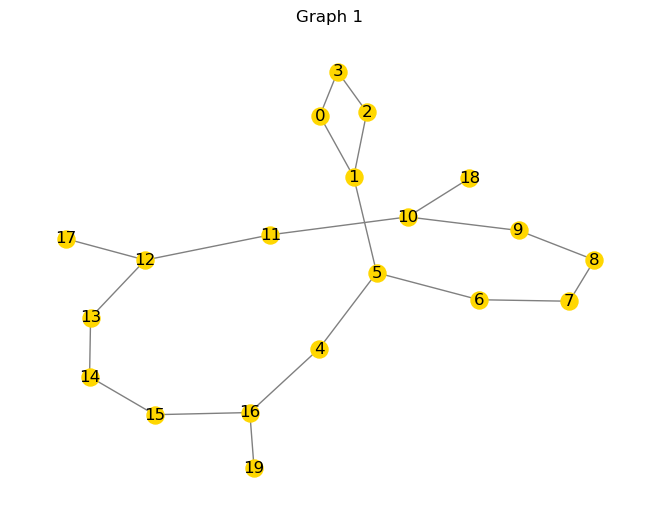

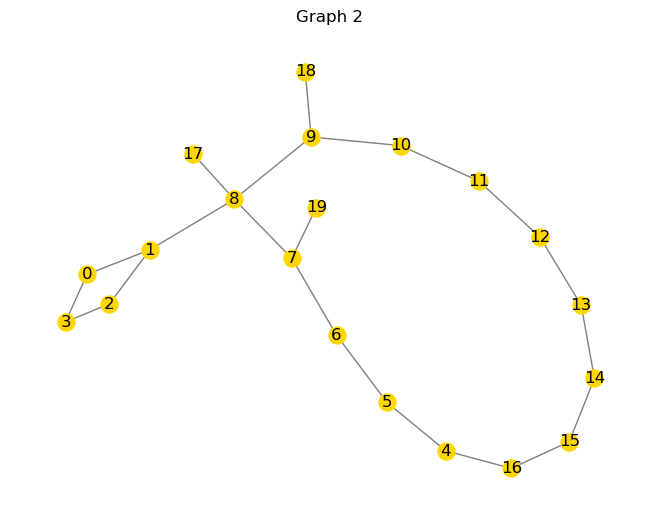

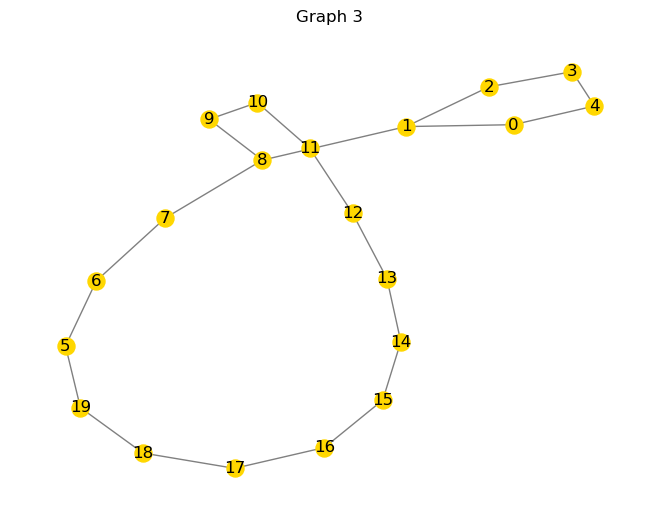

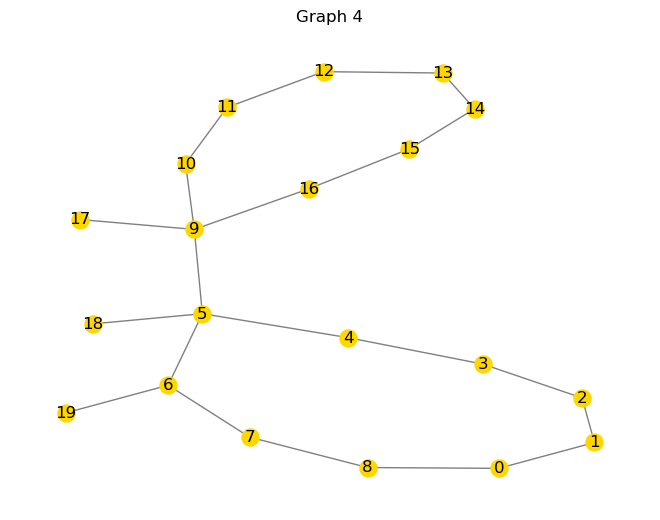

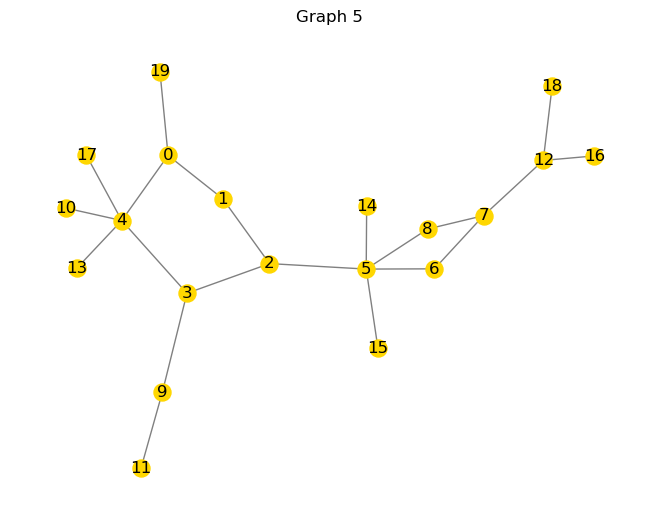

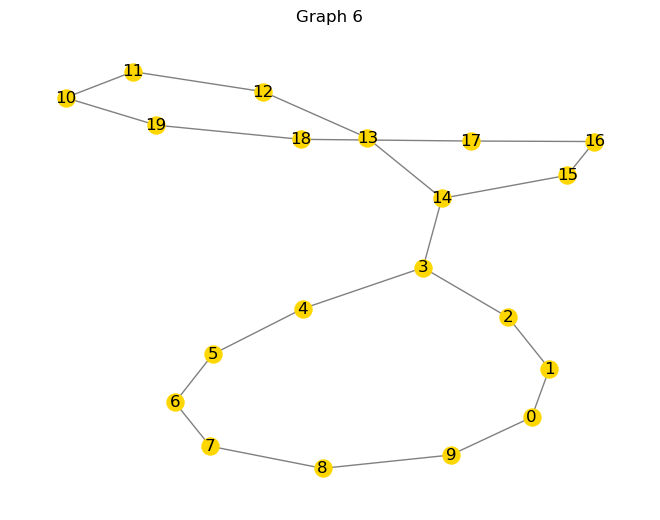

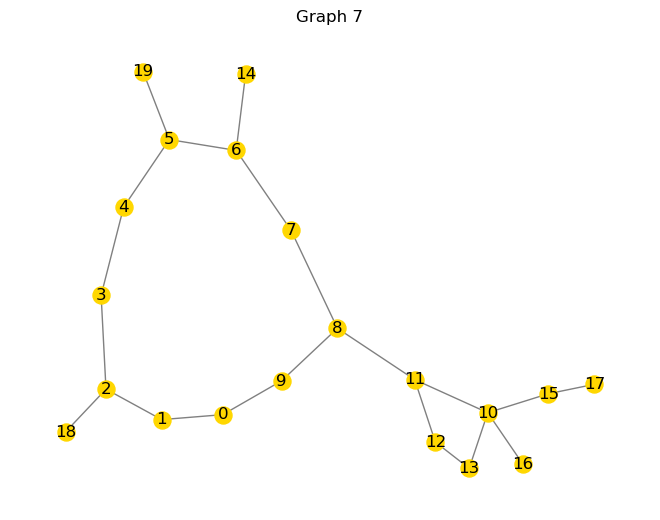

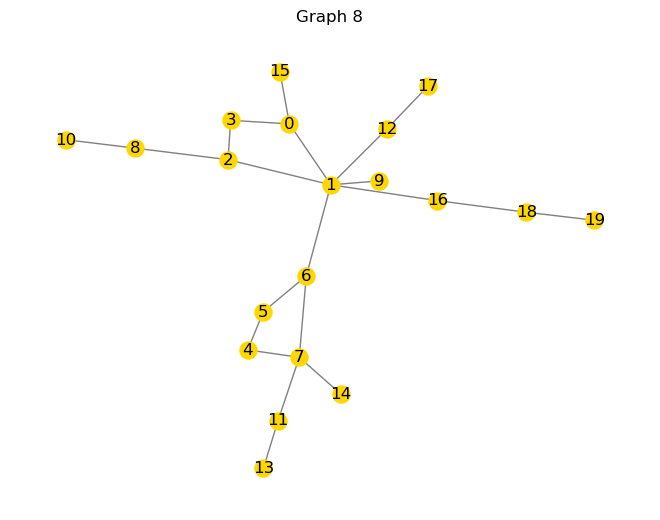

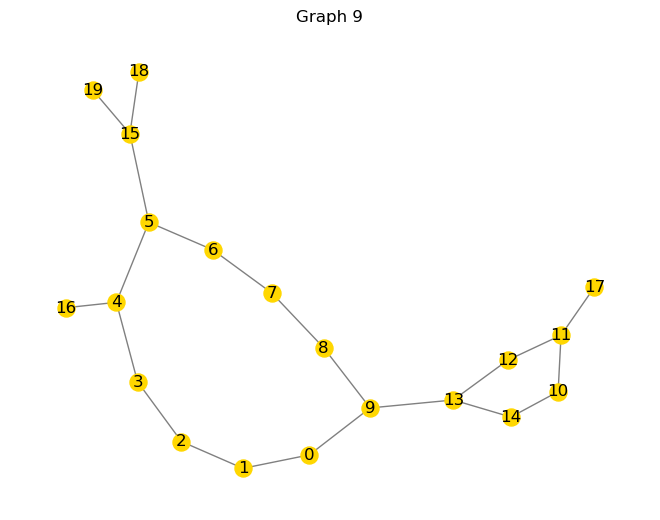

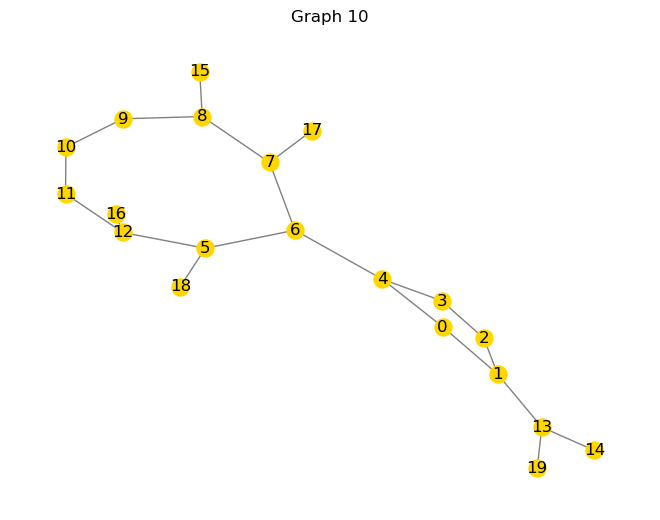

In [4]:
n = 20
num_samples = 10
graphs_stohastic = generate_graphs_with_two_cycles(n, num_samples)

for i, graph in enumerate(graphs_stohastic):
    plt.figure()
    nx.draw(graph, with_labels=True, node_color='gold', node_size=150, edge_color='gray')
    plt.title(f"Graph {i + 1}")
    plt.show()

In [ ]:
def bicyclic_laplacian_integer_graph_stohastic(n, num_samples):
    
    graphs_with_two_cycles = generate_graphs_with_two_cycles(n, num_samples)

    laplacian_graphs = []
    
    for i, graph in enumerate(graphs_with_two_cycles):
        if is_laplacian_integer_graph(graph):
            laplacian_graphs.append(graph)    

    print(f"Total graphs with two cycles for n = {n}: {len(graphs_with_two_cycles)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_graphs)}")

    for i, graph in enumerate(laplacian_graphs):
        print(f"Graph {i + 1}:")
        print("Edges:", list(graph.edges()))
        plt.figure()
        pos = nx.spring_layout(graph) 
        nx.draw(graph, pos, with_labels=True, node_color='gold', node_size=750, edge_color='gray')
        plt.title(f"Laplacian Integer Graph {i + 1}")
        plt.show()

    return laplacian_graphs

Try and fail:

In [ ]:
i = 0
for n in range(10, 101):
    laplace = bicyclic_laplacian_integer_graph_stohastic(n,10000)
    if len(laplace) != 0:
        print("LAPLACE FOUND")
    i += len(laplace)
print()    
print(f"Number of Laplacian integer graphs found: {i}")

Total graphs with two cycles for n = 10: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 11: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 12: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 13: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 14: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 15: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 16: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 17: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 18: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 19: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 20: 100
Total Laplacian integer graphs found: 0
Total graphs with two cycles for n = 21: 100
Total Laplacian inte